In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
#
in_data = loadmat('bucky.mat')
A = in_data['A']
# sigma2 = 50
# A = A + np.sqrt(sigma2/600)* np.random.randn(np.shape(A)[0], np.shape(A)[1])
##

# Load data for activity: Another option
# A = imageio.imread("Whateveryoulike.png")
# A = np.average(A[:,:,0:3], axis=2)/256

rows, cols = np.array(A.shape)

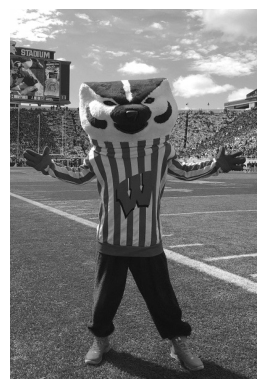

In [2]:
# Display image
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(A,cmap='gray')
ax.set_axis_off()
plt.show()

### What do you conclude about the approximate rank of A? Why is it useful to plot the logarithm of the singular values?

Because it would be easier to tell the rank from the plot. If we do the normal number, the line drops steeply.

68


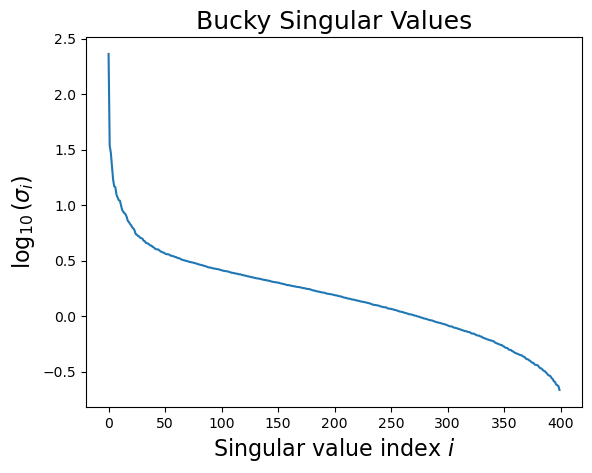

In [3]:
# Bucky's singular values

# Complete and uncomment line below
U,s,VT = np.linalg.svd(A,  full_matrices=False)
S_matrix = np.zeros_like(A)
np.fill_diagonal(S_matrix, s)
# print(S_matrix)
# print(U@S_matrix@VT)
for i, v in enumerate(np.log10(s)):
    if v <= 0.5:
        break     
print(i)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(s))
# ax.plot((s))

ax.set_xlabel('Singular value index $i$', fontsize=16)
ax.set_ylabel('$\log_{10}(\sigma_i)$', fontsize=16)
ax.set_title('Bucky Singular Values', fontsize=18)
plt.show()

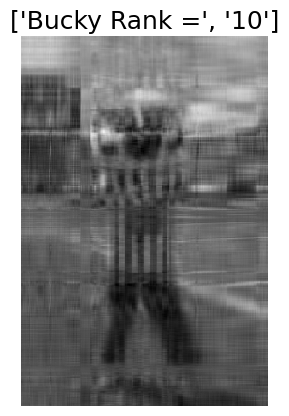

Ar( 10 ) storage propotion: 4.166666666666667 %


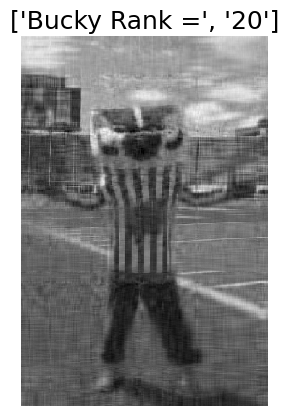

Ar( 20 ) storage propotion: 8.333333333333334 %


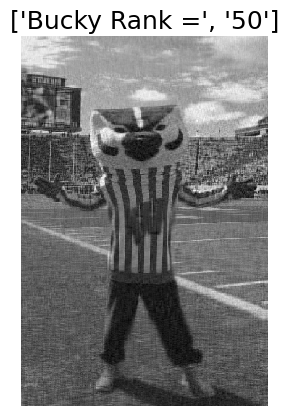

Ar( 50 ) storage propotion: 20.833333333333332 %


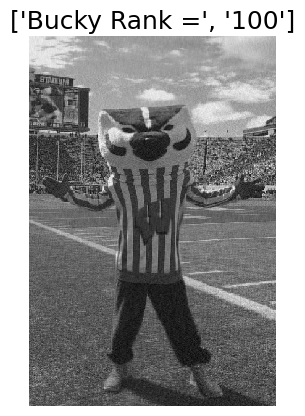

Ar( 100 ) storage propotion: 41.666666666666664 %


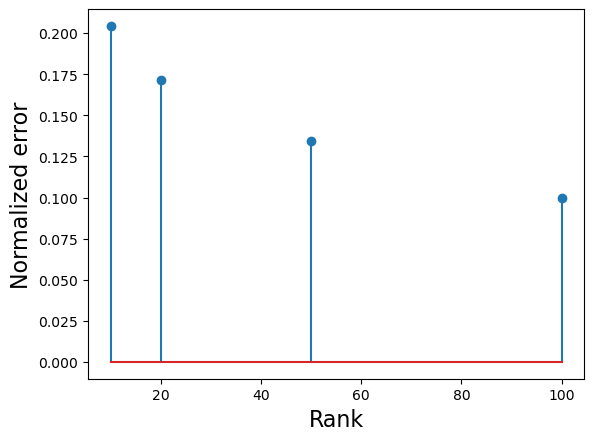

In [4]:
# Find and display low-rank approximations

r_vals = np.array([10, 20, 50, 100 ])
err_fro = np.zeros(len(r_vals))

# display images of various rank approximations
for i, r in enumerate(r_vals):
   
    # Complete and uncomment two lines below
    Ar = U[:,:r]@S_matrix[:r,:r]@VT[:r,:]
    Er = A - Ar
    err_fro[i] = np.linalg.norm(Er,ord='fro')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(Ar,cmap='gray',interpolation='none')
    ax.set_axis_off()
    ax.set_title(['Bucky Rank =', str(r_vals[i])], fontsize=18)
    plt.show()
    # row, col = Ar.shape
    # storage size = 600*r + r*400 = 1000*r
    print('Ar(', r , ') storage propotion:', (1000*r*100) / (600*400), '%')
    
# plot normalized error versus rank
norm_err = err_fro/np.linalg.norm(A,ord='fro')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(r_vals,norm_err)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('Normalized error', fontsize=16)
plt.show()

### Comment on the how the quality of the approximation changes as r increases.

When r increases, the quality of the approximation turns higher.

rank: 68


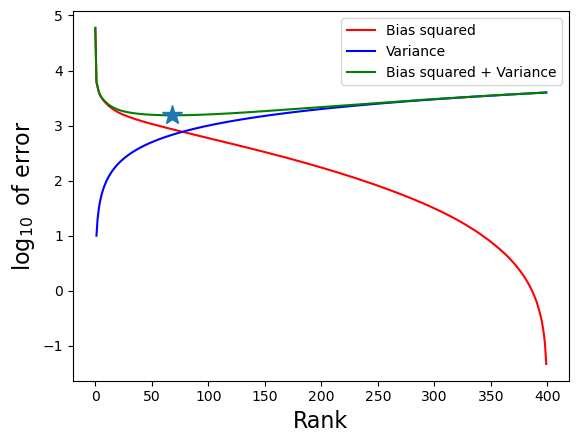

In [5]:
# bias-variance tradeoff
num_sv = min(rows, cols)
bias_2 = np.zeros(num_sv)
ranks = np.arange(num_sv)

for r in range(num_sv):
    bias_2[r] = np.linalg.norm(s[r:num_sv])**2

sigma2 = 10
var = sigma2*ranks
#print(var)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
print('rank:', ranks[min_bias_plus_variance_index])
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()

rank: 18


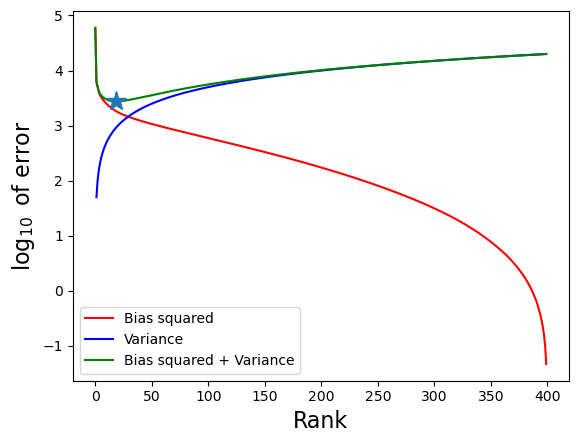

In [6]:
sigma2 = 50
var = sigma2*ranks
#print(var)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
print('rank:', ranks[min_bias_plus_variance_index])
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()

### Fnd the rank of the low-rank approximation that minimizes the sum of the bias squared and variance for a noisy version of Bucky.

When sigma2 increase, we only need a lower rank to get the approximation.

### Simulate the noisy case by performing low-rank approximations to a noisy version of A. 

With the noise, we need a higher rank to get the approximation.